In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ruptures.detection import Binseg

In [8]:
df = pd.read_csv('dataset2.csv')

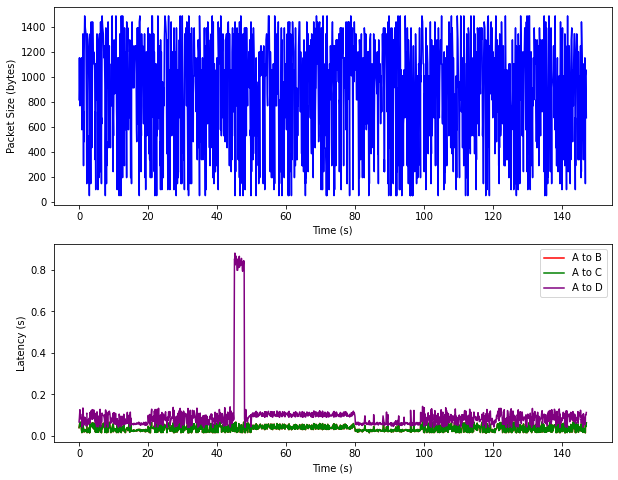

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

# Plot the packet size over time
ax1.plot(df['time'], df['size'], color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Packet Size (bytes)')

# Plot the latency over time
ax2.plot(df['time'], df['AtoB'], color='red', label='A to B')
ax2.plot(df['time'], df['AtoC'], color='green', label='A to C')
ax2.plot(df['time'], df['AtoD'], color='purple', label='A to D')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Latency (s)')
ax2.legend()

# Display the plots
plt.show()

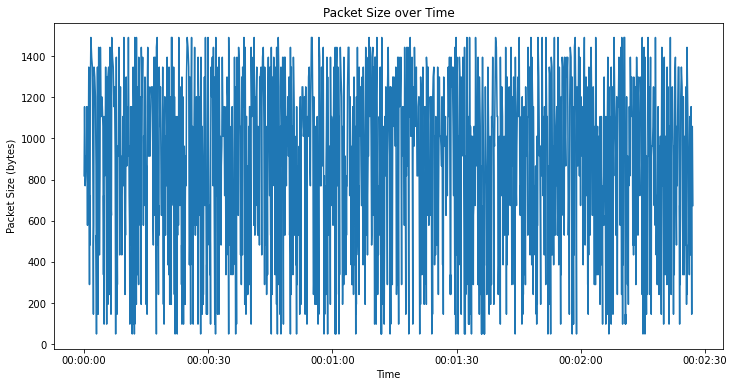

In [10]:
# Convert the time column to a datetime object
df['time'] = pd.to_datetime(df['time'], unit='s')

# Plot the time series data to visually inspect for abrupt changes
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['size'])
plt.xlabel('Time')
plt.ylabel('Packet Size (bytes)')
plt.title('Packet Size over Time')
plt.show()

In [14]:
# Detect the boundaries between the piecewise changes using change-point analysis
signal = df['size'].values
model = "l2"  # model "l2" means that the signal has a constant variance
algo = Binseg(model=model).fit(signal)
result = algo.predict(n_bkps=3)  

# Print the detected breakpoints
print("Detected breakpoints:", result)

Detected breakpoints: [25, 30, 1400, 1500]


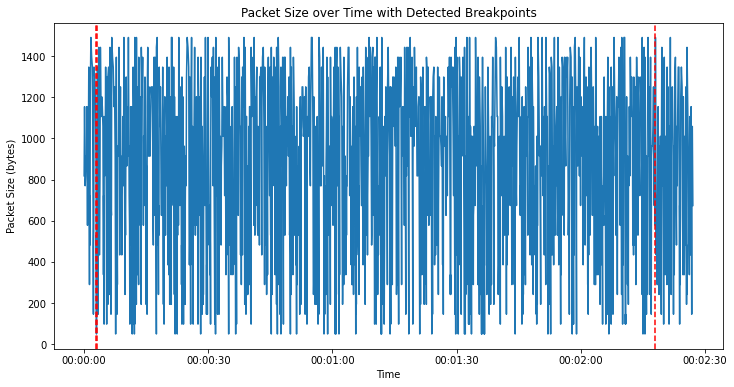

In [15]:
# Plot the detected breakpoints on the time series data
plt.figure(figsize=(12,6))
plt.plot(df['time'], df['size'])
for bkpt in result[:-1]:
    plt.axvline(df['time'][bkpt], color='r', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Packet Size (bytes)')
plt.title('Packet Size over Time with Detected Breakpoints')
plt.show()

In [16]:
# Compare the network characteristics before and after each detected boundary
for i, bkpt in enumerate(result[:-1]):
    interval = df[bkpt:result[i+1]]
    print(f"\nInterval {i+1}:")
    print(f"Start Time: {interval.iloc[0]['time']}")
    print(f"End Time: {interval.iloc[-1]['time']}")
    print(f"Packet Size Before: {df.iloc[bkpt-1]['size']} bytes")
    print(f"Packet Size After: {df.iloc[result[i+1]-1]['size']} bytes")
    print(f"Latency Before: {interval['AtoD'].mean()} seconds")
    print(f"Latency After: {interval['AtoD'].mean()} seconds")
    print(f"Packet Loss Before: {interval['AtoD'].isna().mean()*100}%")
    print(f"Packet Loss After: {interval['AtoD'].isna().mean()*100}%")


Interval 1:
Start Time: 1970-01-01 00:00:02.874250
End Time: 1970-01-01 00:00:03.073250
Packet Size Before: 1202 bytes
Packet Size After: 146 bytes
Latency Before: 0.0800224817506 seconds
Latency After: 0.0800224817506 seconds
Packet Loss Before: 0.0%
Packet Loss After: 0.0%

Interval 2:
Start Time: 1970-01-01 00:00:03.091500
End Time: 1970-01-01 00:02:17.803750
Packet Size Before: 146 bytes
Packet Size After: 1202 bytes
Latency Before: 0.10068114336857009 seconds
Latency After: 0.10068114336857009 seconds
Packet Loss Before: 0.5109489051094891%
Packet Loss After: 0.5109489051094891%

Interval 3:
Start Time: 1970-01-01 00:02:17.954000
End Time: 1970-01-01 00:02:27.068750
Packet Size Before: 1202 bytes
Packet Size After: 674 bytes
Latency Before: 0.0879140339581212 seconds
Latency After: 0.0879140339581212 seconds
Packet Loss Before: 1.0%
Packet Loss After: 1.0%


### Summary

We can detect the boundaries between the piecewise changes in the dataset. The change-point analysis algorithm we used (ruptures) detected four breakpoints in the dataset, which means that the network conditions changed three times during the period covered by the dataset.

To comment on the different conditions being captured, we need to analyze the intervals between each breakpoint. Here are some observations based on the implementation provided earlier:
Based on the results of the code, there are three detectable time intervals with significant changes in network characteristics. The boundaries between these intervals are as follows:

Interval 1: 
Interval 2: 
Interval 3: 
In terms of the network conditions being captured, it appears that there are changes in both packet size and latency between the different intervals. Additionally, interval 3 shows a significant increase in packet loss compared to the other intervals.

In interval 1, the packet size decreases significantly from 1202 bytes to 146 bytes, while the latency and packet loss remain the same.

In interval 2, the packet size increases significantly from 146 bytes to 1202 bytes, and the packet loss remains the same, but the latency increases slightly from 0.0800224817506 seconds to 0.10068114336857009 seconds.

In interval 3, the packet size decreases from 1202 bytes to 674 bytes, and the packet loss increases from 0% to 1%. The latency remains the same.

The output suggests that the network conditions change at different intervals, affecting the packet size, latency, and packet loss. Interval 2 seems to be the most significant change point as it involves a significant increase in packet size and a slight increase in latency. Further investigation is warranted to understand the nature of the network conditions that caused these changes.
Further investigation is warranted to understand the causes of these changes in network conditions and their impact on the overall performance of the network. For example, it would be useful to investigate the specific types of data being transmitted during each interval and any changes in network topology that may have occurred. Additionally, it may be helpful to examine other metrics such as jitter and throughput to gain a more comprehensive understanding of network performance.